In [1]:
#Importing packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
%matplotlib inline

In [2]:
#Reading the data
df= pd.read_csv('C:/Users/Maikol Cerda/Dropbox/2.-DATA SCIENCE COURSES/0.- COURSERA/1.- IBM machine learning with python/Videos/FuelConsumption2.csv')

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
#Select some features
cdf= df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]

cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


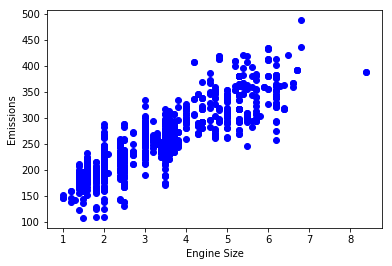

In [7]:
#Plot emission values with engine size
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('Emissions')
plt.show()

In [8]:
#Creating train and test sets
#Train/Test Split involves splitting the dataset into training and testing sets respectively, 
#which are mutually exclusive. After which, you train with the training set and test with the testing set.
msk=np.random.rand(len(df))<0.8
train =cdf[msk]
test= cdf[~msk]

In [10]:
#Creating Polynomial features
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x=np.asanyarray(train[['ENGINESIZE']])
train_y=np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly =PolynomialFeatures(degree=2)
train_x_poly= poly.fit_transform(train_x)

train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [11]:
#Estimation
clf=linear_model.LinearRegression()
train_y_hat=clf.fit(train_x_poly, train_y)

#Recovering the coefficients
print('Coefficients: ', clf.coef_)
print('Intercept: ', clf.intercept_)

Coefficients:  [[ 0.         49.47291454 -1.4475308 ]]
Intercept:  [109.20199986]


In [9]:
#As mentioned before, Coefficient and Intercept , are the parameters of the fit curvy line. 
#Given that it is a typical multiple linear regression, with 3 parameters, and knowing that the parameters 
#are the intercept and coefficients of hyperplane, sklearn has estimated them from our new set of feature sets. 

#Lets plot it:

Text(0, 0.5, 'Emissions')

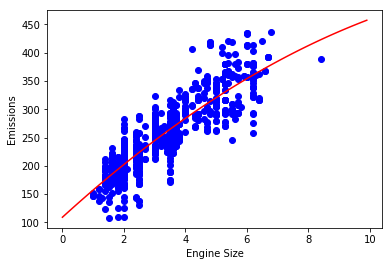

In [17]:
#Plotting data and predicted values
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy =clf.intercept_[0]+clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX,2)
plt.plot(XX, yy, '-r')
plt.xlabel('Engine Size')
plt.ylabel('Emissions')



In [20]:
#Evaluation
from sklearn.metrics import r2_score

test_x_poly=poly.fit_transform(test_x)
test_y_hat=clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 22.76
Residual sum of squares (MSE): 925.45
R2-score: 0.71
